# Treeple tutorial for estimating true posteriors & statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sktree.datasets import make_trunk_mixture_classification
from scipy.stats import multivariate_normal
from treeple_tutorial_toolbox import Calculate_pAUC, Calculate_SA, Calculate_MI

import warnings

warnings.filterwarnings("ignore")

## True posterior estimation

As we know the true priors of each class, we can generate a sufficient amount of samples to estimate the true posteriors and corresponding statistics like *MI*, *pAUC*, and *S@98*. 

## Generate gaussian mixture simulations

In [2]:
# set the simulation parameters and generate samples
X, y = make_trunk_mixture_classification(
    n_samples=10000,
    n_dim=1,
    n_informative=1,
    mu_0=0,
    mu_1=5,
    mix=0.75,
    seed=1,
)

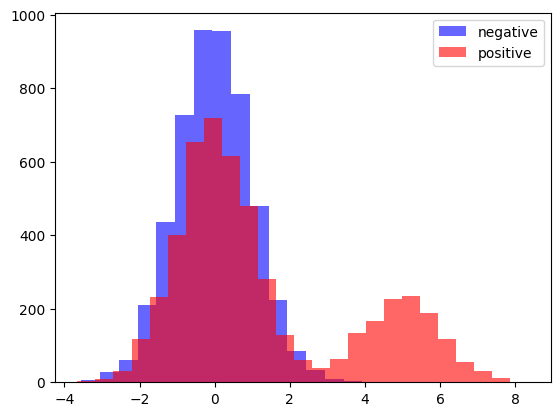

In [3]:
# scatter plot the samples
plt.hist(X[:5000], bins=15, alpha=0.6, color="blue", label="negative")
plt.hist(X[5000:], bins=25, alpha=0.6, color="red", label="positive")
plt.legend()
plt.show()

## Calculate X priors with true pdfs

$$f_{X}(x) = f_{X  \mid Y = 0}(x)\mathbb{P}(Y = 0) + f_{X  \mid Y = 1}(x)\mathbb{P}(Y = 1)$$

In [4]:
# calculate pdf for class zero
pdf_class0 = multivariate_normal.pdf(X, mean=0)

# calculate pdf for each component of class one
pdf_class1_0 = multivariate_normal.pdf(X, mean=0)
pdf_class1_1 = multivariate_normal.pdf(X, mean=5)

# combine the class one pdfs
pdf_class1 = 0.75 * pdf_class1_0 + 0.25 * pdf_class1_1

In [5]:
# Y prior is 0.5 for balanced class
p_x = pdf_class0 * 0.5 + pdf_class1 * 0.5

## Calculate true posteriors

$$\mathbb{P}(Y  \mid X = x) = \frac{f_{X  \mid Y}(x)\mathbb{P}(Y )}{f_{X}(x)}$$

In [6]:
pos_class0 = pdf_class0 * 0.5 / p_x
pos_class1 = pdf_class1 * 0.5 / p_x

pos = np.hstack((pos_class0.reshape(-1, 1), pos_class1.reshape(-1, 1)))

## Generate true statistic estimates: S@98

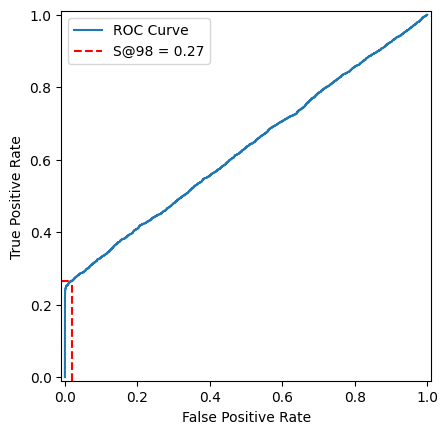

In [7]:
sa98 = Calculate_SA(y, pos, max_fpr=0.02)

## Generate true statistic estimates: MI

In [8]:
mi = Calculate_MI(y, pos)
print("MI =", round(mi, 2))

MI = 0.09


## Generate true statistic estimates: pAUC@90

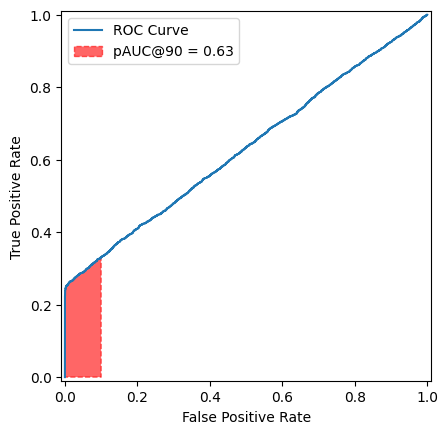

In [9]:
pAUC = Calculate_pAUC(y, pos, max_fpr=0.1)